#### Student Name: Shirley Qi
#### Student ID: A15818203


# CSE 190 Assignment 1

### Mozart Dice Game, Fourier Transforms, Spectrograms, and Griffin-Lim Phase Reconstruction

Instructions: 

This notebook is an interactive assignment; please read and follow the instructions in each cell.

Assignments are to be completed individually.

Cells that require your input (in the form of code or written response) will have 'Question #' above.

After completing the assignment, please submit this notebook as a PDF and your Mozart Dice Game MIDI.

Mozart Dice Game
--------------

For this section of the assignment, you will implement the Mozart Dice Game using MIDI. 

Your composition will be a 16-measure minuet using 'dice rolls' (random generation in Python). 

Please check out the interactive demo available here (http://www.playonlinedicegames.com/mozart). 

Please see the code in the cell below for an example of combining MIDI files together (since you will be combining musical cells to create your Mozart Dice Game composition). You may want to install MIT's music21 python library (http://web.mit.edu/music21/) using pip. If you would rather combine MIDI files with another method, feel free to explore. 

The MIDI files, created by Packard Humanities Institute's Center for Computer Assisted Research in the Humanities at Stanford University, can be found in a .zip archive in the assignment repository. 

The code cell below also contains the filenames of candidate phrases for each of the 16 measures of your Mozart Dice Menuet (A1-B8). Using a random 'dice roll,' you will select one of the candidates for that measure of your minuet. The final product is the stitched-together combination of all 16 measures, selected via dice roll. 

Please save a .midi file of your randomly generated minuet to submit to Gradescope.

In [2]:
pip install music21

     |████████████████████████████████| 19.2 MB 2.7 MB/s eta 0:00:01
  Created wheel for music21: filename=music21-6.7.1-py3-none-any.whl size=21941692 sha256=65704186dd0a01a37b91d446f618b3b0ab4f79de8f7d3bf5945ee55c0d1b4443
  Stored in directory: /Users/shirleyqi/Library/Caches/pip/wheels/54/ee/05/49c0a0f02167de02da2d44d86afbc6e399073f2244d5a9f6b8
Successfully built music21
Note: you may need to restart the kernel to use updated packages.


In [15]:
from music21 import midi as midi21
from music21 import stream
import copy
import music21

def play(x):
    """Returns nothing. Outputs a midi realization of x, a note or stream.
    Primarily for use in notebooks and web environments.
    """  
    if isinstance(x, stream.Stream):
        x = copy.deepcopy(x)
        for subStream in x.recurse(streamsOnly=True, includeSelf=True):
            mss = subStream.getElementsByClass(stream.Measure)
            for ms in mss:
                ms.offset += 1.0
    if isinstance(x, music21.note.Note):
        s = stream.Stream()
        s.append(music21.note.Rest(1))
        s.append(x)
        x = s
    x.show('midi')

mf1 = midi21.MidiFile()
mf1.open("mozartdicegame/cda001.mid")
mf1.read()
mf1.close()
s1 = midi21.translate.midiFileToStream(mf1)

mf2 = midi21.MidiFile()
mf2.open("mozartdicegame/cda002.mid")
mf2.read()
mf2.close()
s2 = midi21.translate.midiFileToStream(mf2)

myStream = stream.Stream()
myStream.append(s1)
myStream.append(s2)
play(myStream)
myStream.write('midi', fp='combined_midi.mid')


A1 = "070 010 033 036 105 165 007 142 099 085 145"
A2 = "014 064 001 114 150 152 081 106 068 045 097"
A3 = "164 100 160 008 057 112 131 040 086 090 006"
A4 = "122 012 163 035 071 015 037 069 139 158 121"
A5 = "025 149 077 111 117 147 021 043 120 082 056"
A6 = "153 030 156 039 052 027 125 140 092 123 067"
A7 = "018 161 168 137 132 073 049 023 143 078 063" 
A8 = "167 011 172 044 130 102 115 089 083 058 016"

B1 = "155 148 022 004 136 144 116 066 093 061 050"
B2 = "003 028 176 157 091 104 133 124 055 034 079" 
B3 = "162 135 062 038 138 087 072 026 029 119 175" 
B4 = "170 173 126 009 019 107 141 084 051 046 076" 
B5 = "013 169 031 151 134 128 094 075 042 059 113" 
B6 = "166 174 024 032 101 048 080 103 110 054 088" 
B7 = "095 002 159 017 154 109 129 096 108 060 053" 
B8 = "005 020 041 171 146 074 065 127 098 047 118" 


##### Question 1 (Including Output MIDI) [15 points]

In [16]:
### Your Mozart Dice Game implementation here:
import random

minuet_arr = []
minuet_arr.append(A1)
minuet_arr.append(A2)
minuet_arr.append(A3)
minuet_arr.append(A4)
minuet_arr.append(A5)
minuet_arr.append(A6)
minuet_arr.append(A7)
minuet_arr.append(A8)
minuet_arr.append(B1)
minuet_arr.append(B2)
minuet_arr.append(B3)
minuet_arr.append(B4)
minuet_arr.append(B5)
minuet_arr.append(B6)
minuet_arr.append(B7)
minuet_arr.append(B8)

minuet = stream.Stream()

for i in range(16):
    pieces_arr = minuet_arr[i].split()
    rand_num = random.randint(0, 10)
    piece = pieces_arr[rand_num]
    file_name = "mozartdicegame/cda"+piece+".mid"
    
    mf = midi21.MidiFile()
    mf.open(file_name)
    mf.read()
    mf.close()
    s = midi21.translate.midiFileToStream(mf)
    minuet.append(s)
    
play(minuet)
minuet.write('midi', fp='dice_game_minuet.mid')


'dice_game_minuet.mid'

Fourier Transform
--------------

The Discrete Fourier Transform (DFT) is the primary analysis tool for digital signal processing. By using matrix/vector representation, the DFT can be understood as a transformation of digital signals into a new vector space.

In this space  the columns of the DFT are the basis vectors. One important idea is that we call these vectors as "frequencies", but mathematically they simply represent the original data in a different space.

This is the mathematical definition of DFT matrix

$$ \mathbf{U} = \frac{1}{\sqrt N} \left[ \exp \left( j \frac{2\pi}{N} n k \right) \right]_{n\in\{0,N_s-1\},k\in\{0,N-1\}} $$


where $n$ counts the samples as rows and $k$ indexes the discrete frequencies (which are our new basis) as columns. 

##### Question 2 [15 points]

In [24]:
pip install librosa

     |████████████████████████████████| 203 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 51 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 613 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 377 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 323 kB 1.2 MB/s eta 0:00:01
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23141 sha256=c01ad20b64926cce0567892a9387affb50405a20ba3d8416c33aa31fddab66be
  Stored in directory: /Users/shirleyqi/Library/Caches/pip/wheels/49/5a/e4/df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320718 sha256=7eafdffc7b035486cc96e541db39986d3e0827784cd7f96994210868c972e285
  Stored in directory: /Users/shirleyqi/Library/Caches/pip/wheels/6f/d1/5d/f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
Successfully built audioread resampy
Note: you may need to restart the kernel to use updated package

In [57]:
from __future__ import  division
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy
from scipy import signal
import librosa
%matplotlib inline
import IPython.display as ipydisplay
from IPython.display import Audio, display

def dftmatrix(Nfft=32,N=None):
    'construct DFT matrix'
    k = np.arange(Nfft)
    if N is None: N = Nfft
    n = np.arange(N)
    
    ### Implement the DFT matrix (U) here
    imaginary = complex(0,1)
    c = imaginary*2*np.pi/N
    U = np.exp(np.outer(n, k)*c)
    
    return U/np.sqrt(Nfft)

Nfft=8
Ns=8
U = dftmatrix(Nfft=Nfft,N=Ns)

We can plot these basis as pairs of real and imaginary vectors

<ipython-input-58-44cf29f146c1>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(Nfft,2,2*i+1)
<ipython-input-58-44cf29f146c1>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(Nfft,2,2*(i+1))


Text(0.5, 0, 'n')

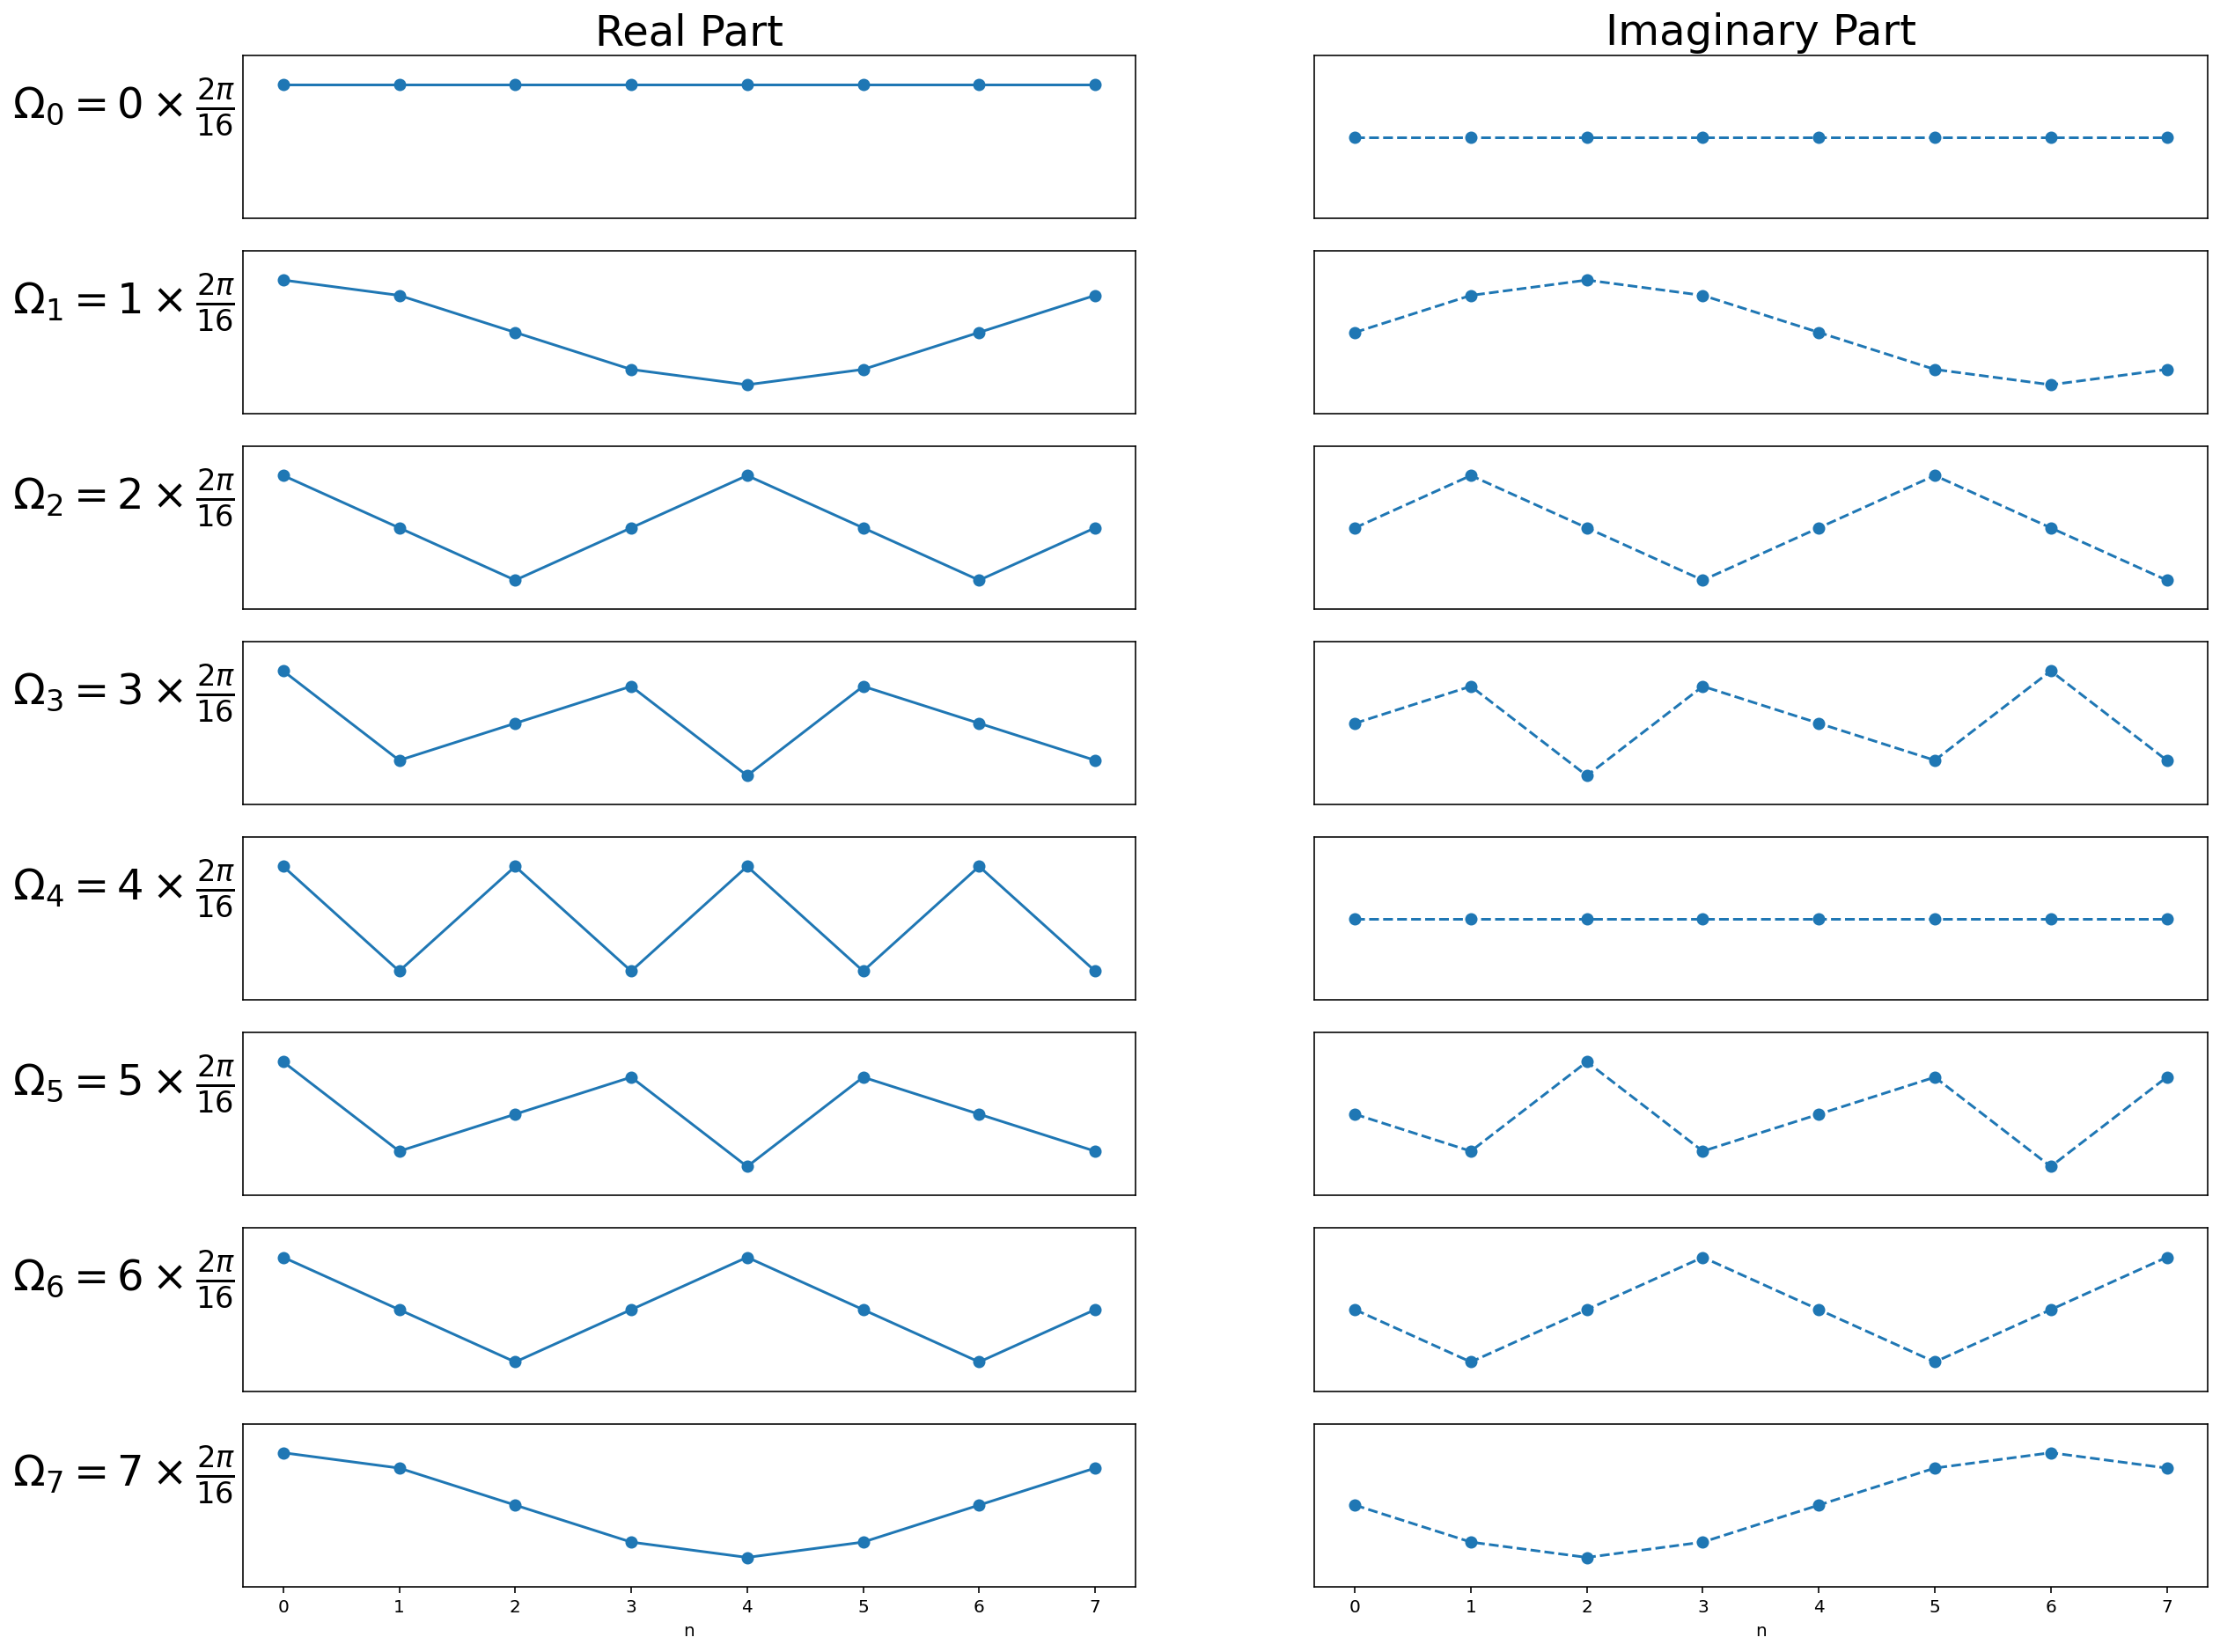

In [58]:
plt.rcParams['figure.figsize'] = (20, 16)

# plots in the left column
plt.subplot(Nfft,2,1)
plt.title('Real Part',fontsize=24)

for i in range(Nfft):
    plt.subplot(Nfft,2,2*i+1)
    plt.xticks([]);  plt.yticks([])
    plt.ylabel(r'$\Omega_{%d}=%d\times\frac{2\pi}{16}$'%(i,i),fontsize=24, 
        rotation='horizontal',horizontalalignment='right')
    plt.plot(np.array(U.real[:,i]),'-o')
    plt.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)
plt.xticks(np.arange(Nfft))
plt.xlabel('n')

# plots in the  right column
plt.subplot(Nfft,2,2)
plt.title('Imaginary Part',fontsize=24)

for i in range(Nfft):
    ax=plt.subplot(Nfft,2,2*(i+1))
    plt.xticks([]);  plt.yticks([])
    plt.plot(np.array(U.imag[:,i]),'--o')
    plt.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)    
plt.xticks(np.arange(Nfft))
plt.xlabel('n')

##### Question 3 [5 points]

What do you observe in the above plots, considering symmetries and the relationship between real & imaginary parts?

The real graphs and their corresponding imaginary graphs look very similar. Some look reflected horizontally, others reflected vertically, and some look translated to the left or right. The only imaginary part that looks much different from its corresponding real part was for omega4, where the imaginary part was just a straight line.

Computing the DFT
--------------------

To compute the DFT using the matrix, we calculate the following,

$$ \mathbf{X} = \mathbf{U}^H \mathbf{x}$$

which individually takes each of the columns of $\mathbf{U}$ and computes the inner product as the $i^{th}$ entry,

$$ \mathbf{X}_i = \mathbf{U}_i^H \mathbf{x}$$

That is, we are measuring the *degree of similarity* between each column of $\mathbf{U}$ and the input vector. We can think of this as the coefficient of the projection of $\mathbf{x}$ onto  $\mathbf{u}_i$.

We can retrieve the original input from the DFT by calculating

$$ \mathbf{x} = \mathbf{U} \mathbf{U}^H \mathbf{X} $$

### Example: finding a frequency of a signal

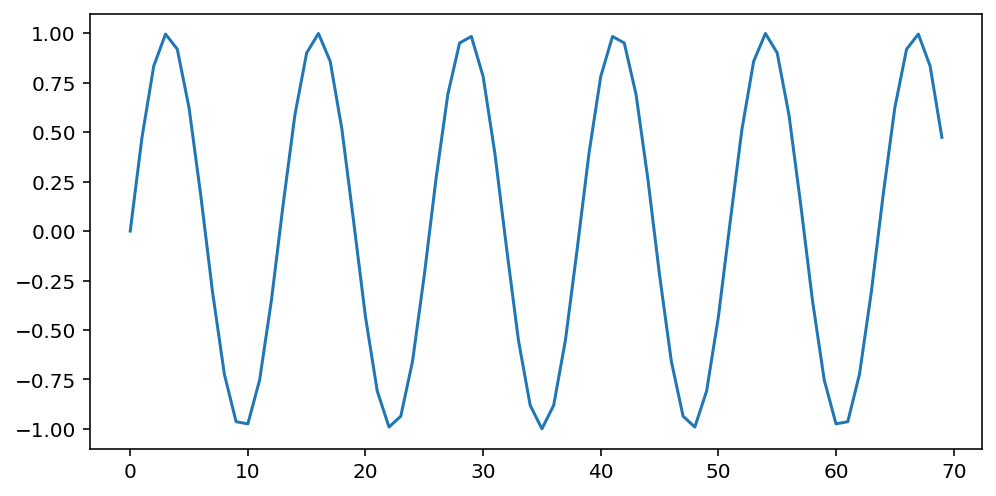

In [33]:
plt.rcParams['figure.figsize'] = (8, 4)

Ns = 70
freq = 5.5/Ns
t = np.arange(Ns)
x = np.sin(2*np.pi*freq*t)
plt.plot(x)
plt.show()

##### Question 4 [10 points]

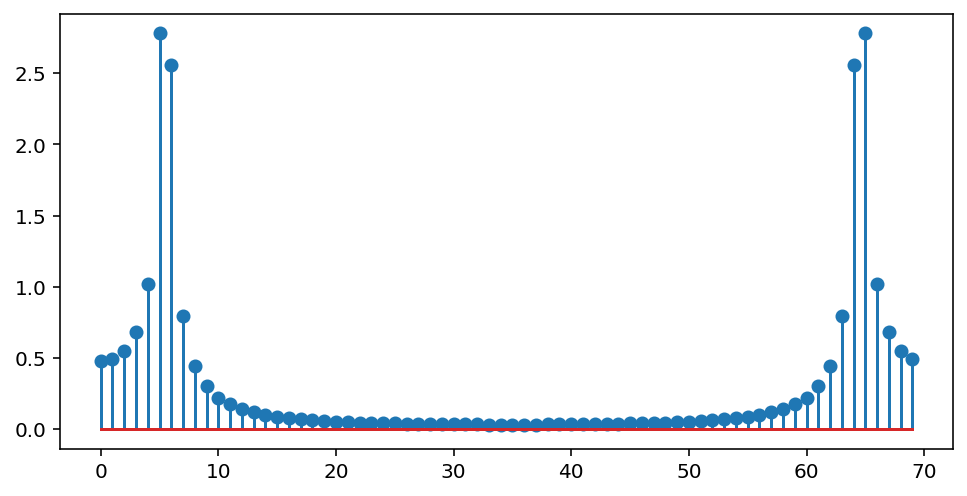

In [47]:
Nfft = Ns
U = dftmatrix(Nfft=Nfft,N=Ns)
x = np.matrix(x)

### Compute X, the DFT of signal x
U = np.asmatrix(U)
X = np.inner(U.H,x)

plt.stem(np.array(abs(X)))
plt.show()

##### Question 5 [5 points]

Where do you observe peaks in the DFT plot? How would you describe the DFT plot symmetry? 

I see peaks at around 5 and 65. The left and right sides of the DFT plot are symmetrical, about the axis x = 35.

# Seeing Sound Using Spectrograms

For this portion of the assignment, you will have the chance to see your own voice!
First, make two recordings of yourself:

In the first recording, you will say a vowel sound of your choice ("ah", "ee", "oo", etc.). Try to keep the sound short (no longer than you would make the vowel sound in a typical word ("car", "see", "good"). 

In the second recording, sing (or play on an instrument) any major scale, at a tempo of 60 bpm. (Don't worry, it doesn't need to be perfect- your best effort will be great!). 

Make sure both of your recordings are saved as mono WAV files. Audacity is a great tool to quickly convert audio file formats (and convert from stereo to mono). 

In [39]:
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

##### Question 6 [5 points]

In [48]:
### Modify the line below with your WAV file:
sample_rate, input_signal = wavfile.read("ah.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)

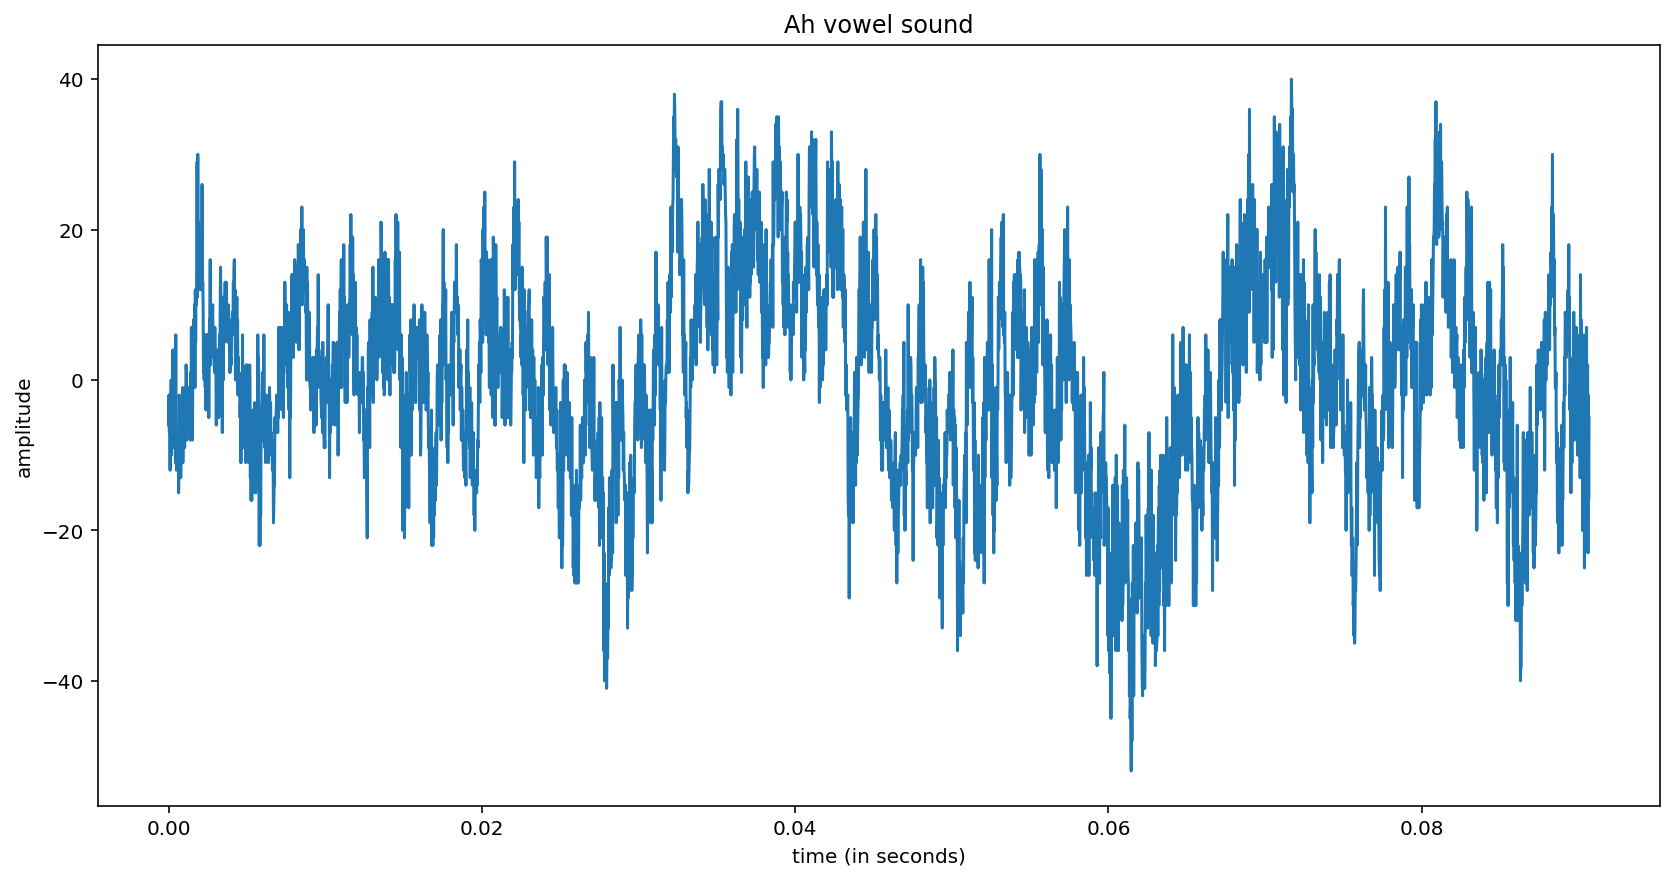

In [49]:
setup_graph(title='Ah vowel sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

##### Question 7 [5 points]

The FFT of your input signal is complex valued (real and imaginary components). 
To visualize the output of the FFT of your input signal, we will calculate the magnitude of the FFT output.
In your code, you may want to make use of the .real and .imag members of the numpy complex128 class as you explore the fft_out datatype. 

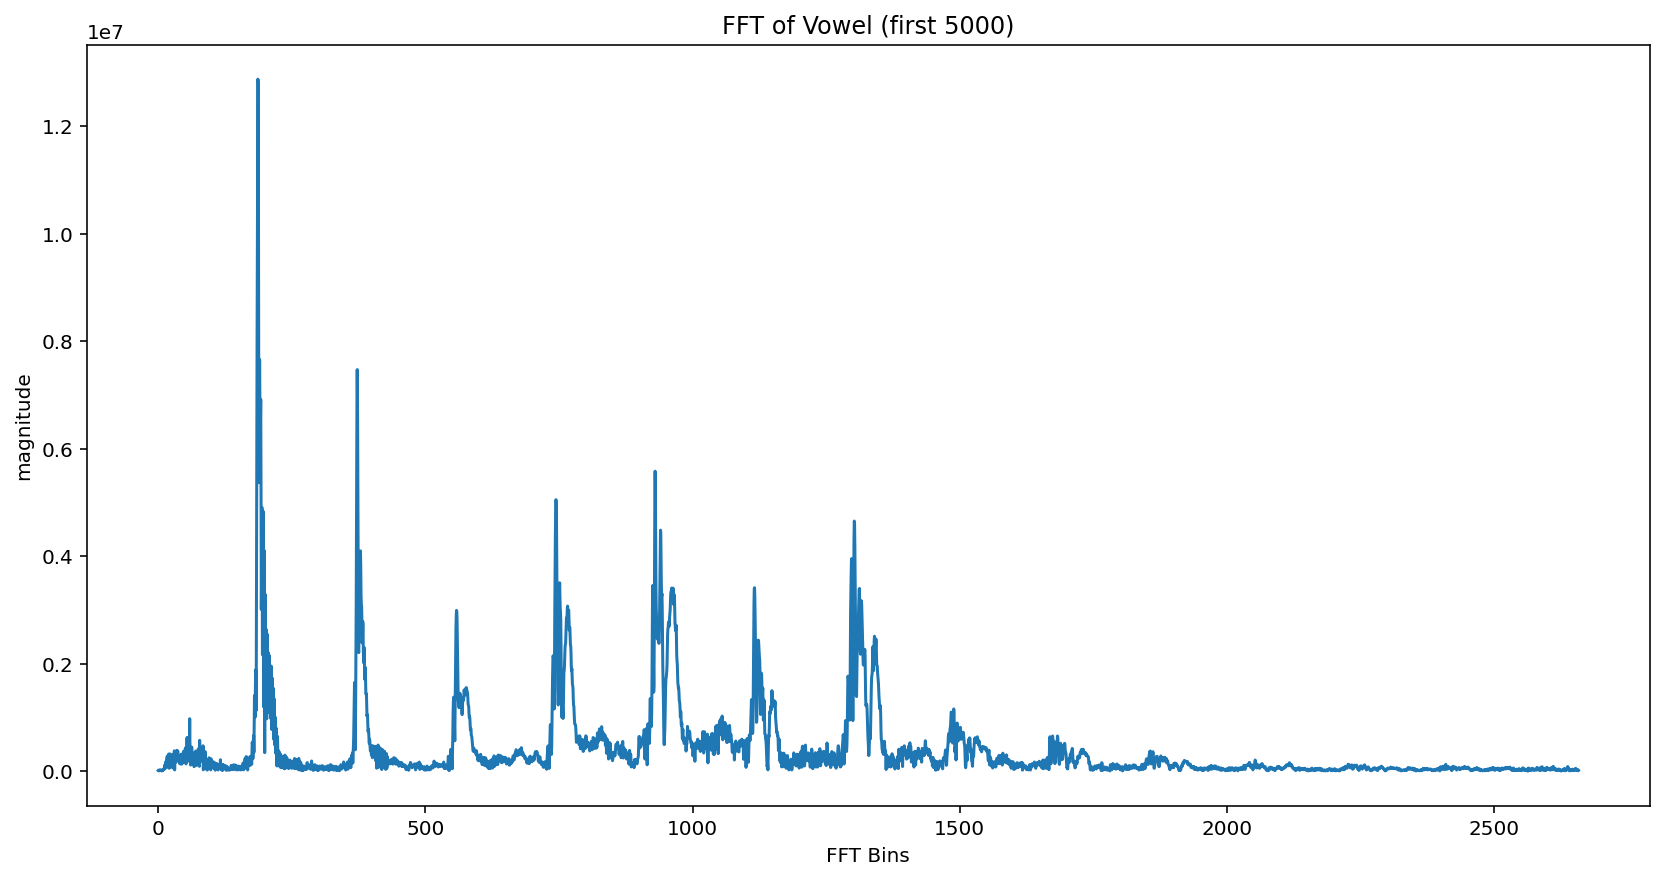

In [50]:
fft_out = np.fft.rfft(input_signal)

fft_mag = np.sqrt(np.square(fft_out.real) + np.square(fft_out.imag))

num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]
setup_graph(title='FFT of Vowel (first 5000)', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:5000], fft_mag[0:5000])

##### Question 8 [5 points]

Would you expect another person's recording of the same vowel sound (on the same pitch and at the same volume) to have a similar FFT graph? What musical term is used to describe this quality? 

No, the graph will vary from person to person. Since the pitch and volume are the same, the general height and position of the peaks should be similar, but the overall shape of the graph will look different. This quality is called timbre, which states that two different sounds at the same pitch and volume can have different tone quality, affecting the sound and waveform, and therefore the FFT graph.

# Spectrogram (FFT over time)

### Axes

* x-axis: time
* y-axis: frequency
* z-axis (color): strength of each frequency

### See the Harmonics!

##### Question 9 [5 points]

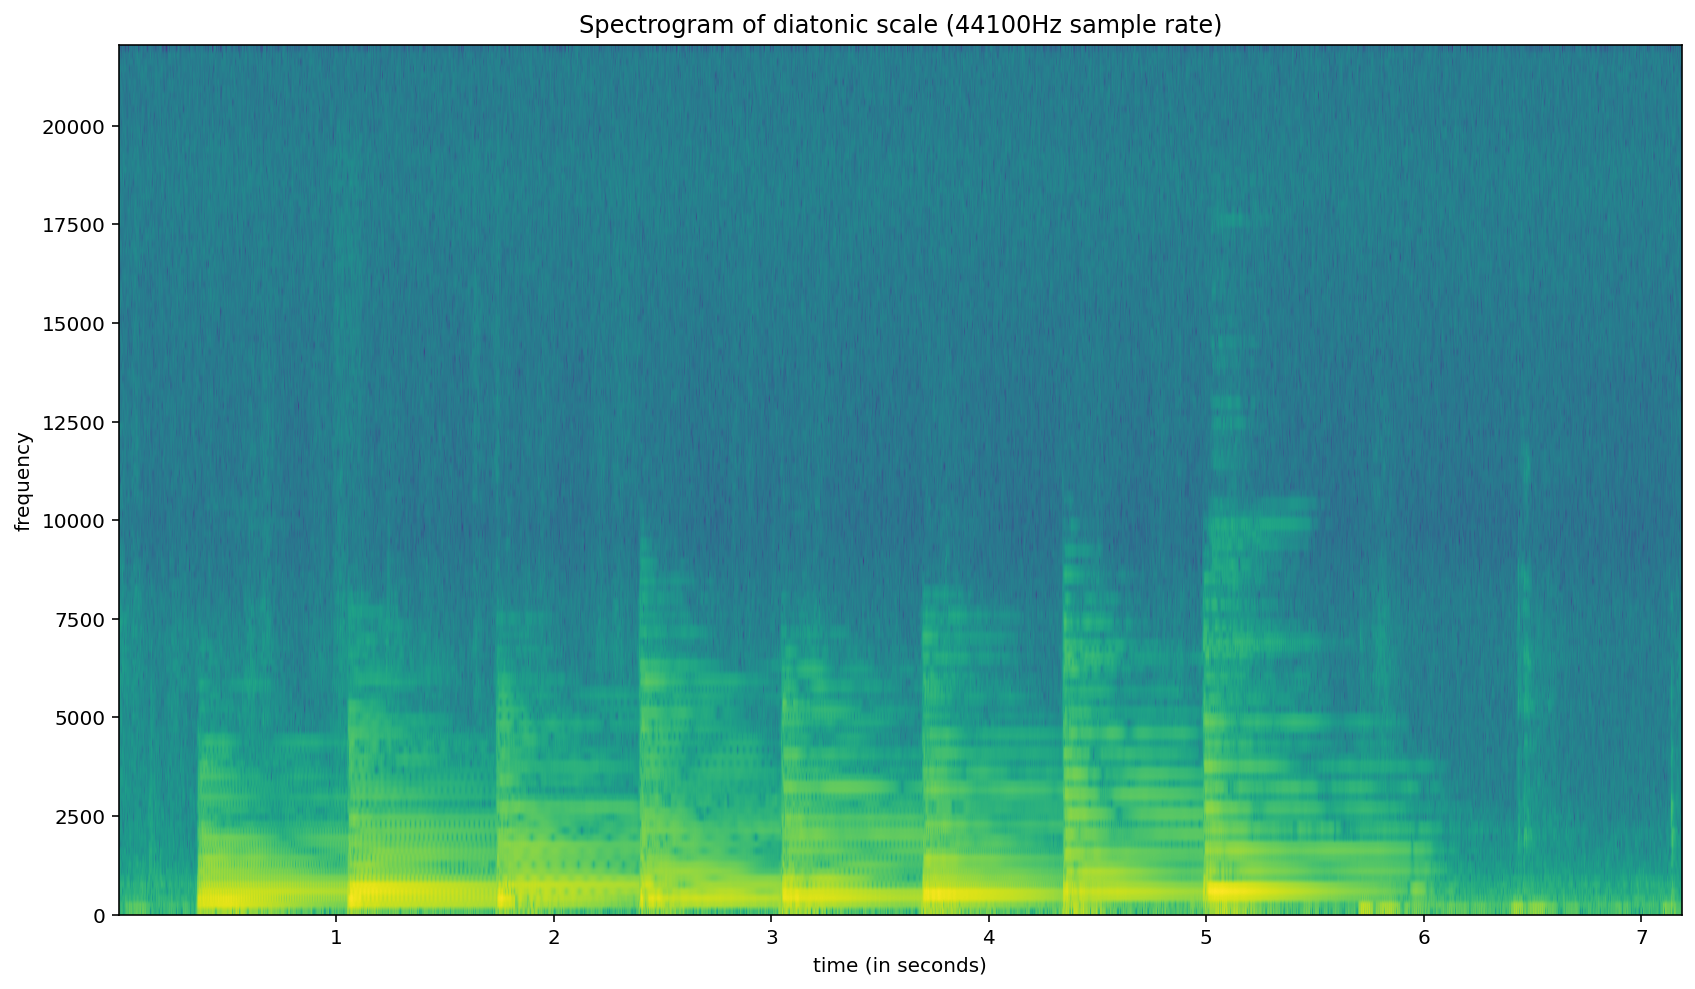

In [54]:
### Modify the line below:
sample_rate, sample = wavfile.read("cmajor_scale.wav")

setup_graph(title='Spectrogram of diatonic scale (%dHz sample rate)' % sample_rate, x_label='time (in seconds)', y_label='frequency', fig_size=(14,8))
_ = plt.specgram(sample, Fs=sample_rate)

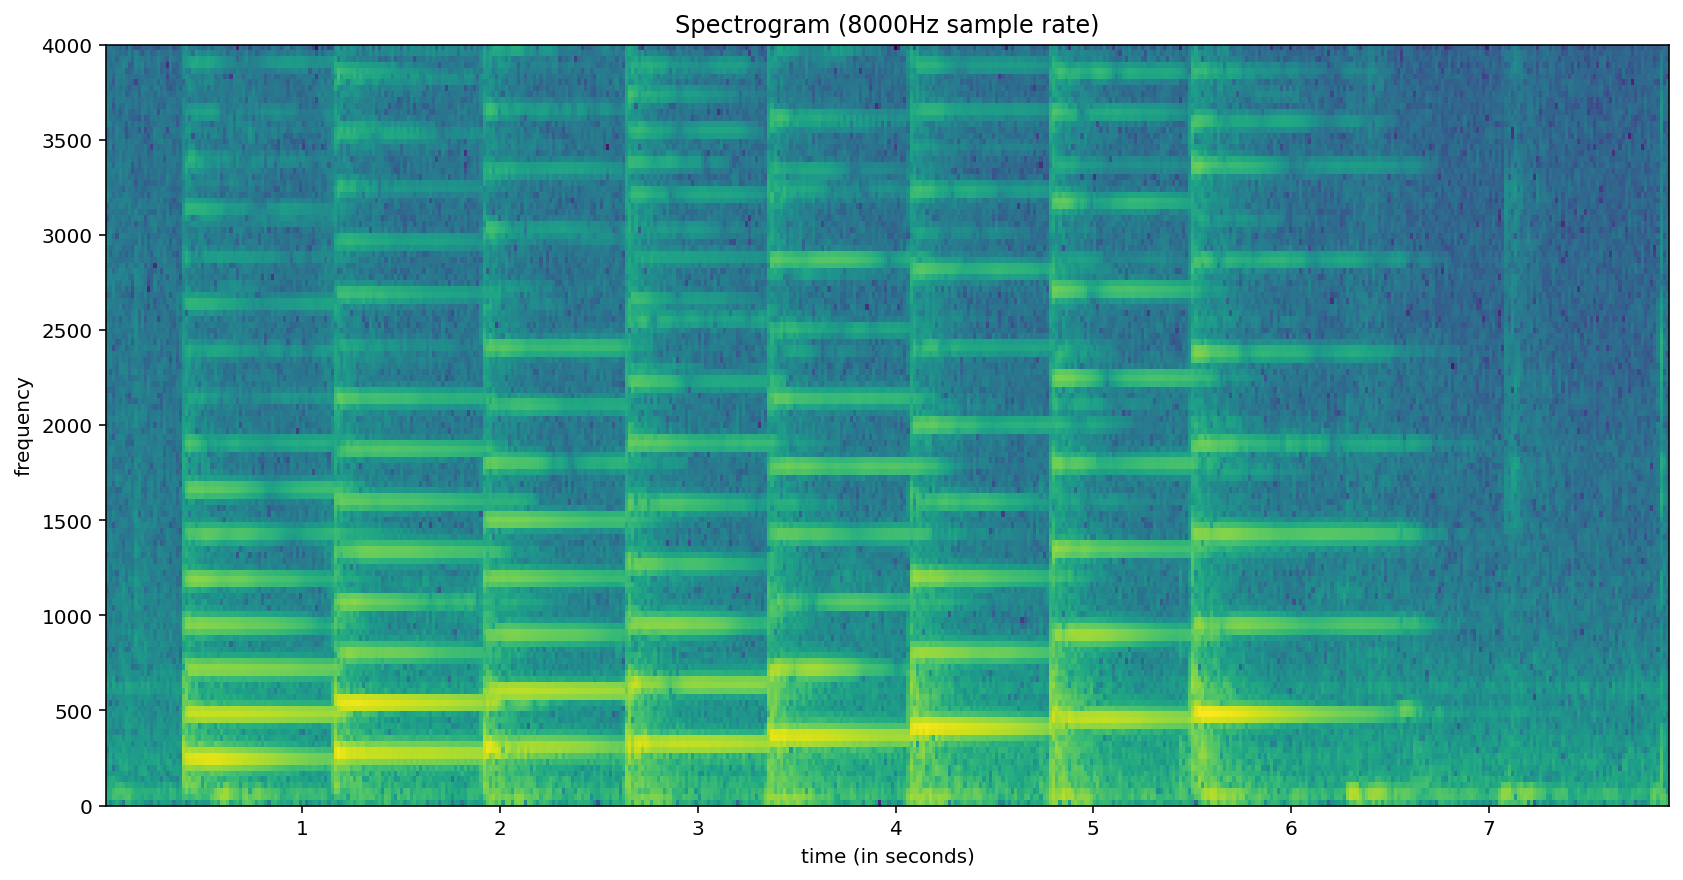

In [55]:
sample_8000hz = [sample[i] for i in range(0, len(sample), sample_rate//8000)]
setup_graph(title='Spectrogram (8000Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(sample_8000hz, Fs=8000)

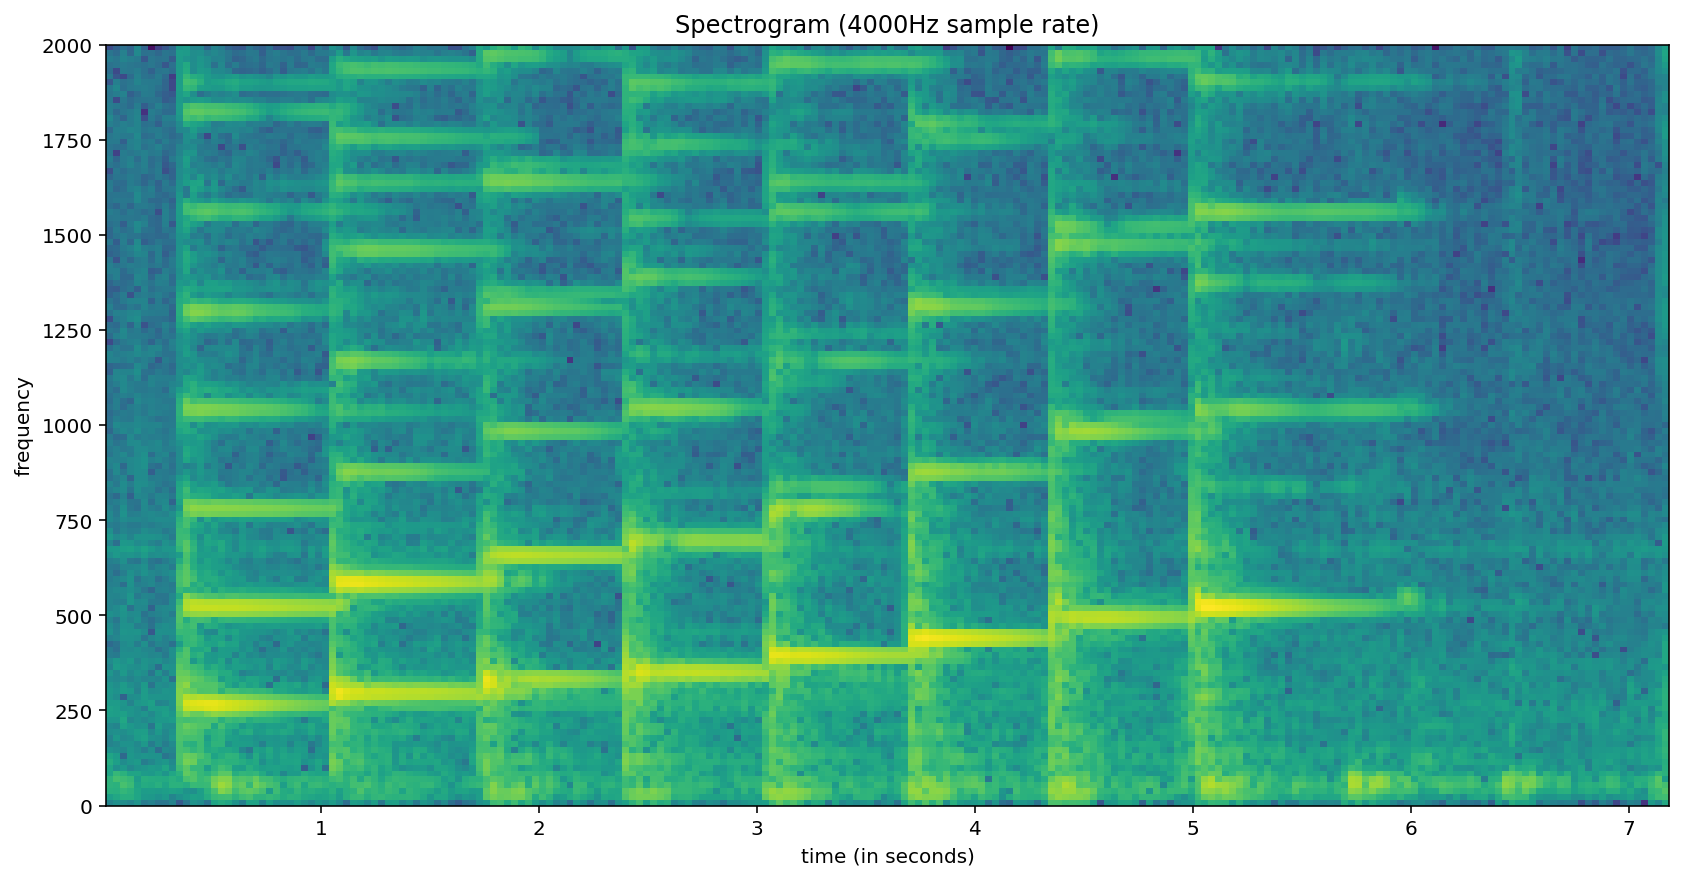

In [56]:
sample_4000hz = [sample[i] for i in range(0, len(sample), sample_rate//4000)]
setup_graph(title='Spectrogram (4000Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(sample_4000hz, Fs=4000)

##### Question 10 [5 points]

In your recording, you were singing (or playing) a single note at a time. Does this still appear to be the case when looking at the spectrogram of your recording? What are you observing? 

No, there seems to be other frequencies showing up for each note. We are observing the overtones of the notes.

##### Question 11 [5 points]

What would you expect the relationship between the first and last note on your spectrogram to be? Is this the case?  

I would expect the fundamental frequency of the last note to be double the fundamental frequency of the first note. This seems to be the case, as the first note has a frequency of 250Hz, whereas the last note has a frequency of 500Hz.

## Spectrogram inversion from spectral amplitude

Short-time Fourier Transform (STFT) analysis takes short snapshots of sound and represents them as a matrix of fft vectors.
As we saw above, the fft is a complex transform that contain information about amplitude and phase of each frequency component. In many applications we choose to discard the phases and use the amplitudes only. 

One challenge is to reconstruct the original waveform from amplitude information only.

For these questions, we will explore an iterative method by Griffin and Lim.

Let's start with creating spectral amplitudes of your earlier vowel WAV file:

##### Question 12 [5 points]

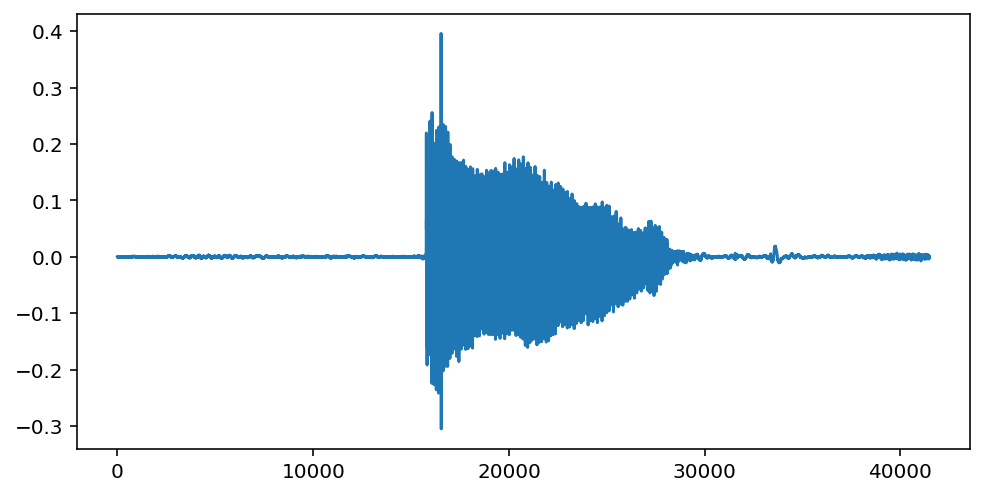

In [51]:
# Reads wav file and produces spectrum
# Fourier phases are ignored

def wave_to_spectum(x, n_fft):
    S = librosa.stft(x, n_fft)
    p = np.angle(S)   
    A = np.log1p(np.abs(S))  
    return A

### Replace the string below with your file:
filename = 'ah.wav'
x, fs = librosa.load(filename)
n_fft = 2048
plt.plot(x)
SA = wave_to_spectum(x, n_fft)

In [52]:
ipydisplay.Audio(data=x, rate=fs)

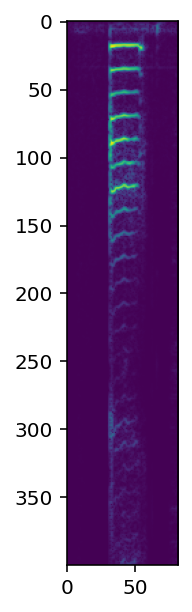

In [53]:
plt.figure(figsize=(15,5))
plt.imshow(SA[:400,:])
plt.show()

## Griffin and Lim method

In the next code block, you will implement the Griffin and Lim iterative method for phase reconstruction.
Please look over the pseudocode available on pg. 1865 of Wakabayashi & Ono's 2019 paper, available at http://www.apsipa.org/proceedings/2019/pdfs/290.pdf

The random phase initialization is provided as p. Please use 1000 iterations for your reconstruction. 

You may find the librosa functions istft and stft helpful in your implementation. 

##### Question 13 [15 points]

In [95]:
def write_spectrum_wav(a, N_FFT):
    # Given input amplitude a, return reconstructed signal x using the Griffin & Lim iterative method. 
    p = 2 * np.pi * np.random.random_sample(a.shape) - np.pi
    X = np.multiply(a, p)
    x = librosa.istft(a)
    
    for i in range(1000):
        Y = librosa.stft(x, N_FFT)
        _, phase = librosa.magphase(Y)
        X = np.multiply(a, phase)
        x = librosa.istft(X)
        
    return x
    
x_out = write_spectrum_wav(SA, n_fft)

Now we can compare your reconstruction to the original signal, both auditorily and visually: 

In [96]:
import soundfile as sf

OUTPUT_FILENAME = 'out.wav'
sf.write(OUTPUT_FILENAME, x_out, fs)
display(Audio(OUTPUT_FILENAME))

In [97]:
display(Audio(filename))

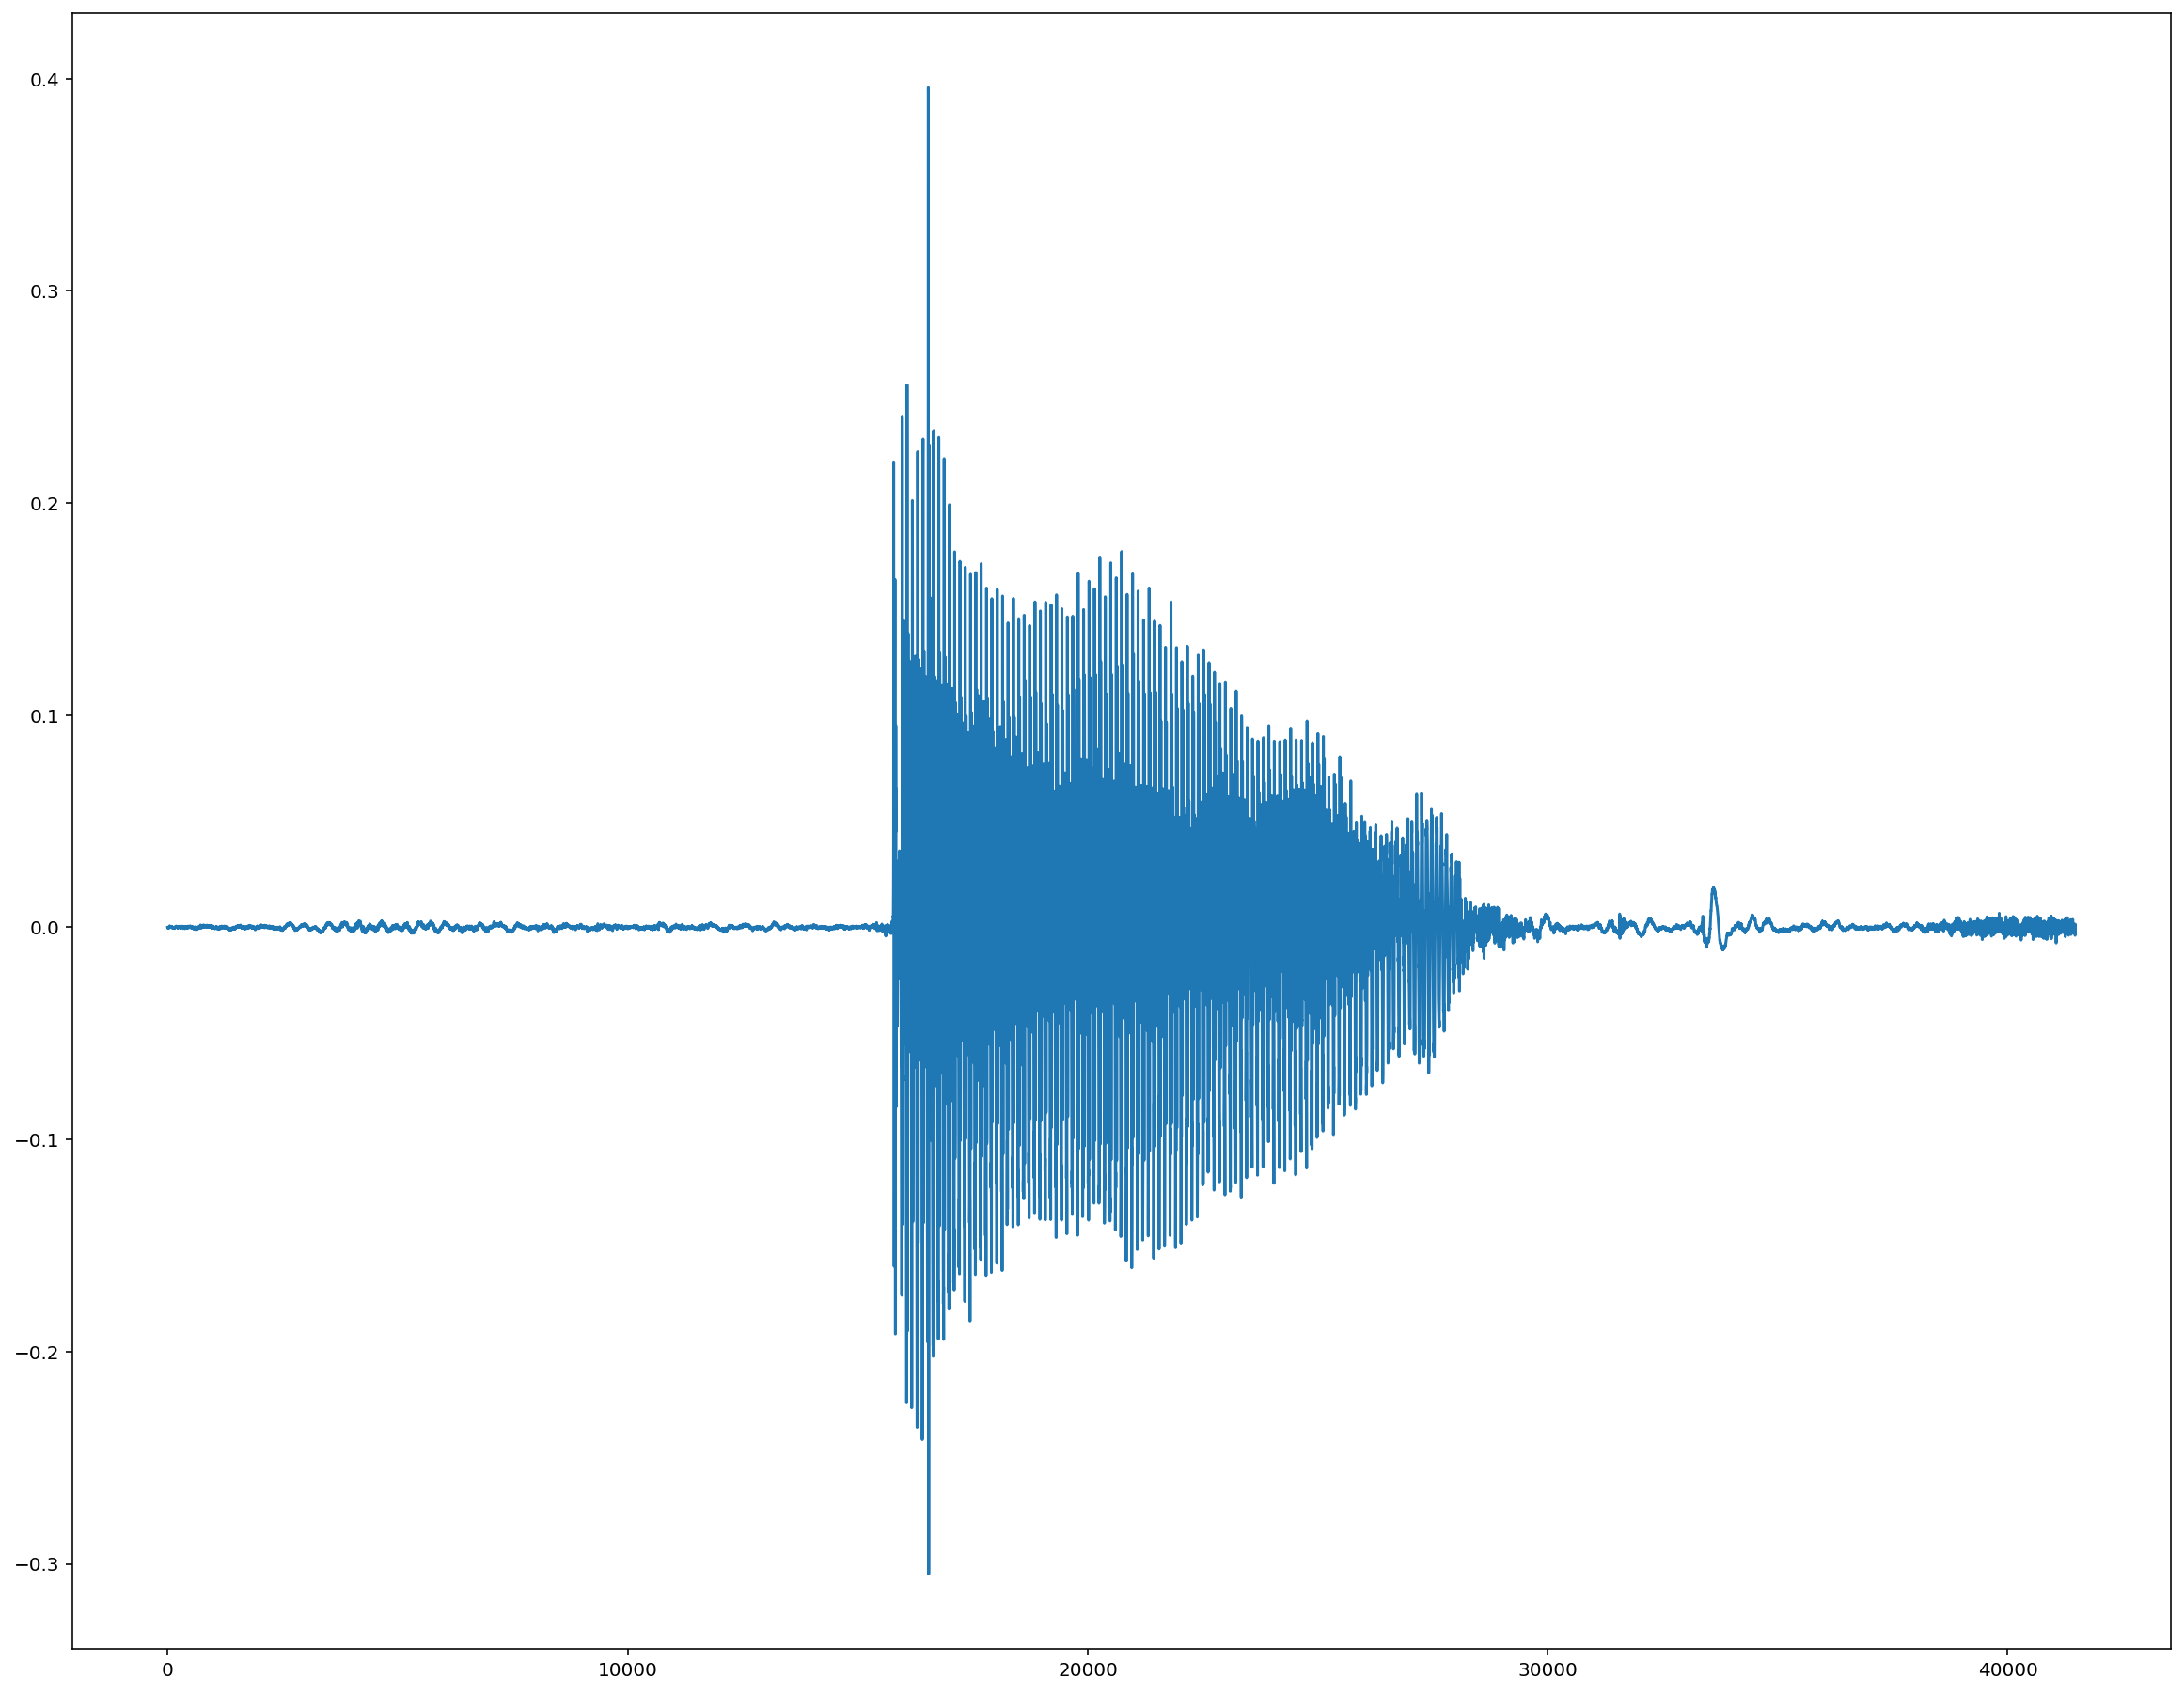

In [98]:
plt.plot(x)

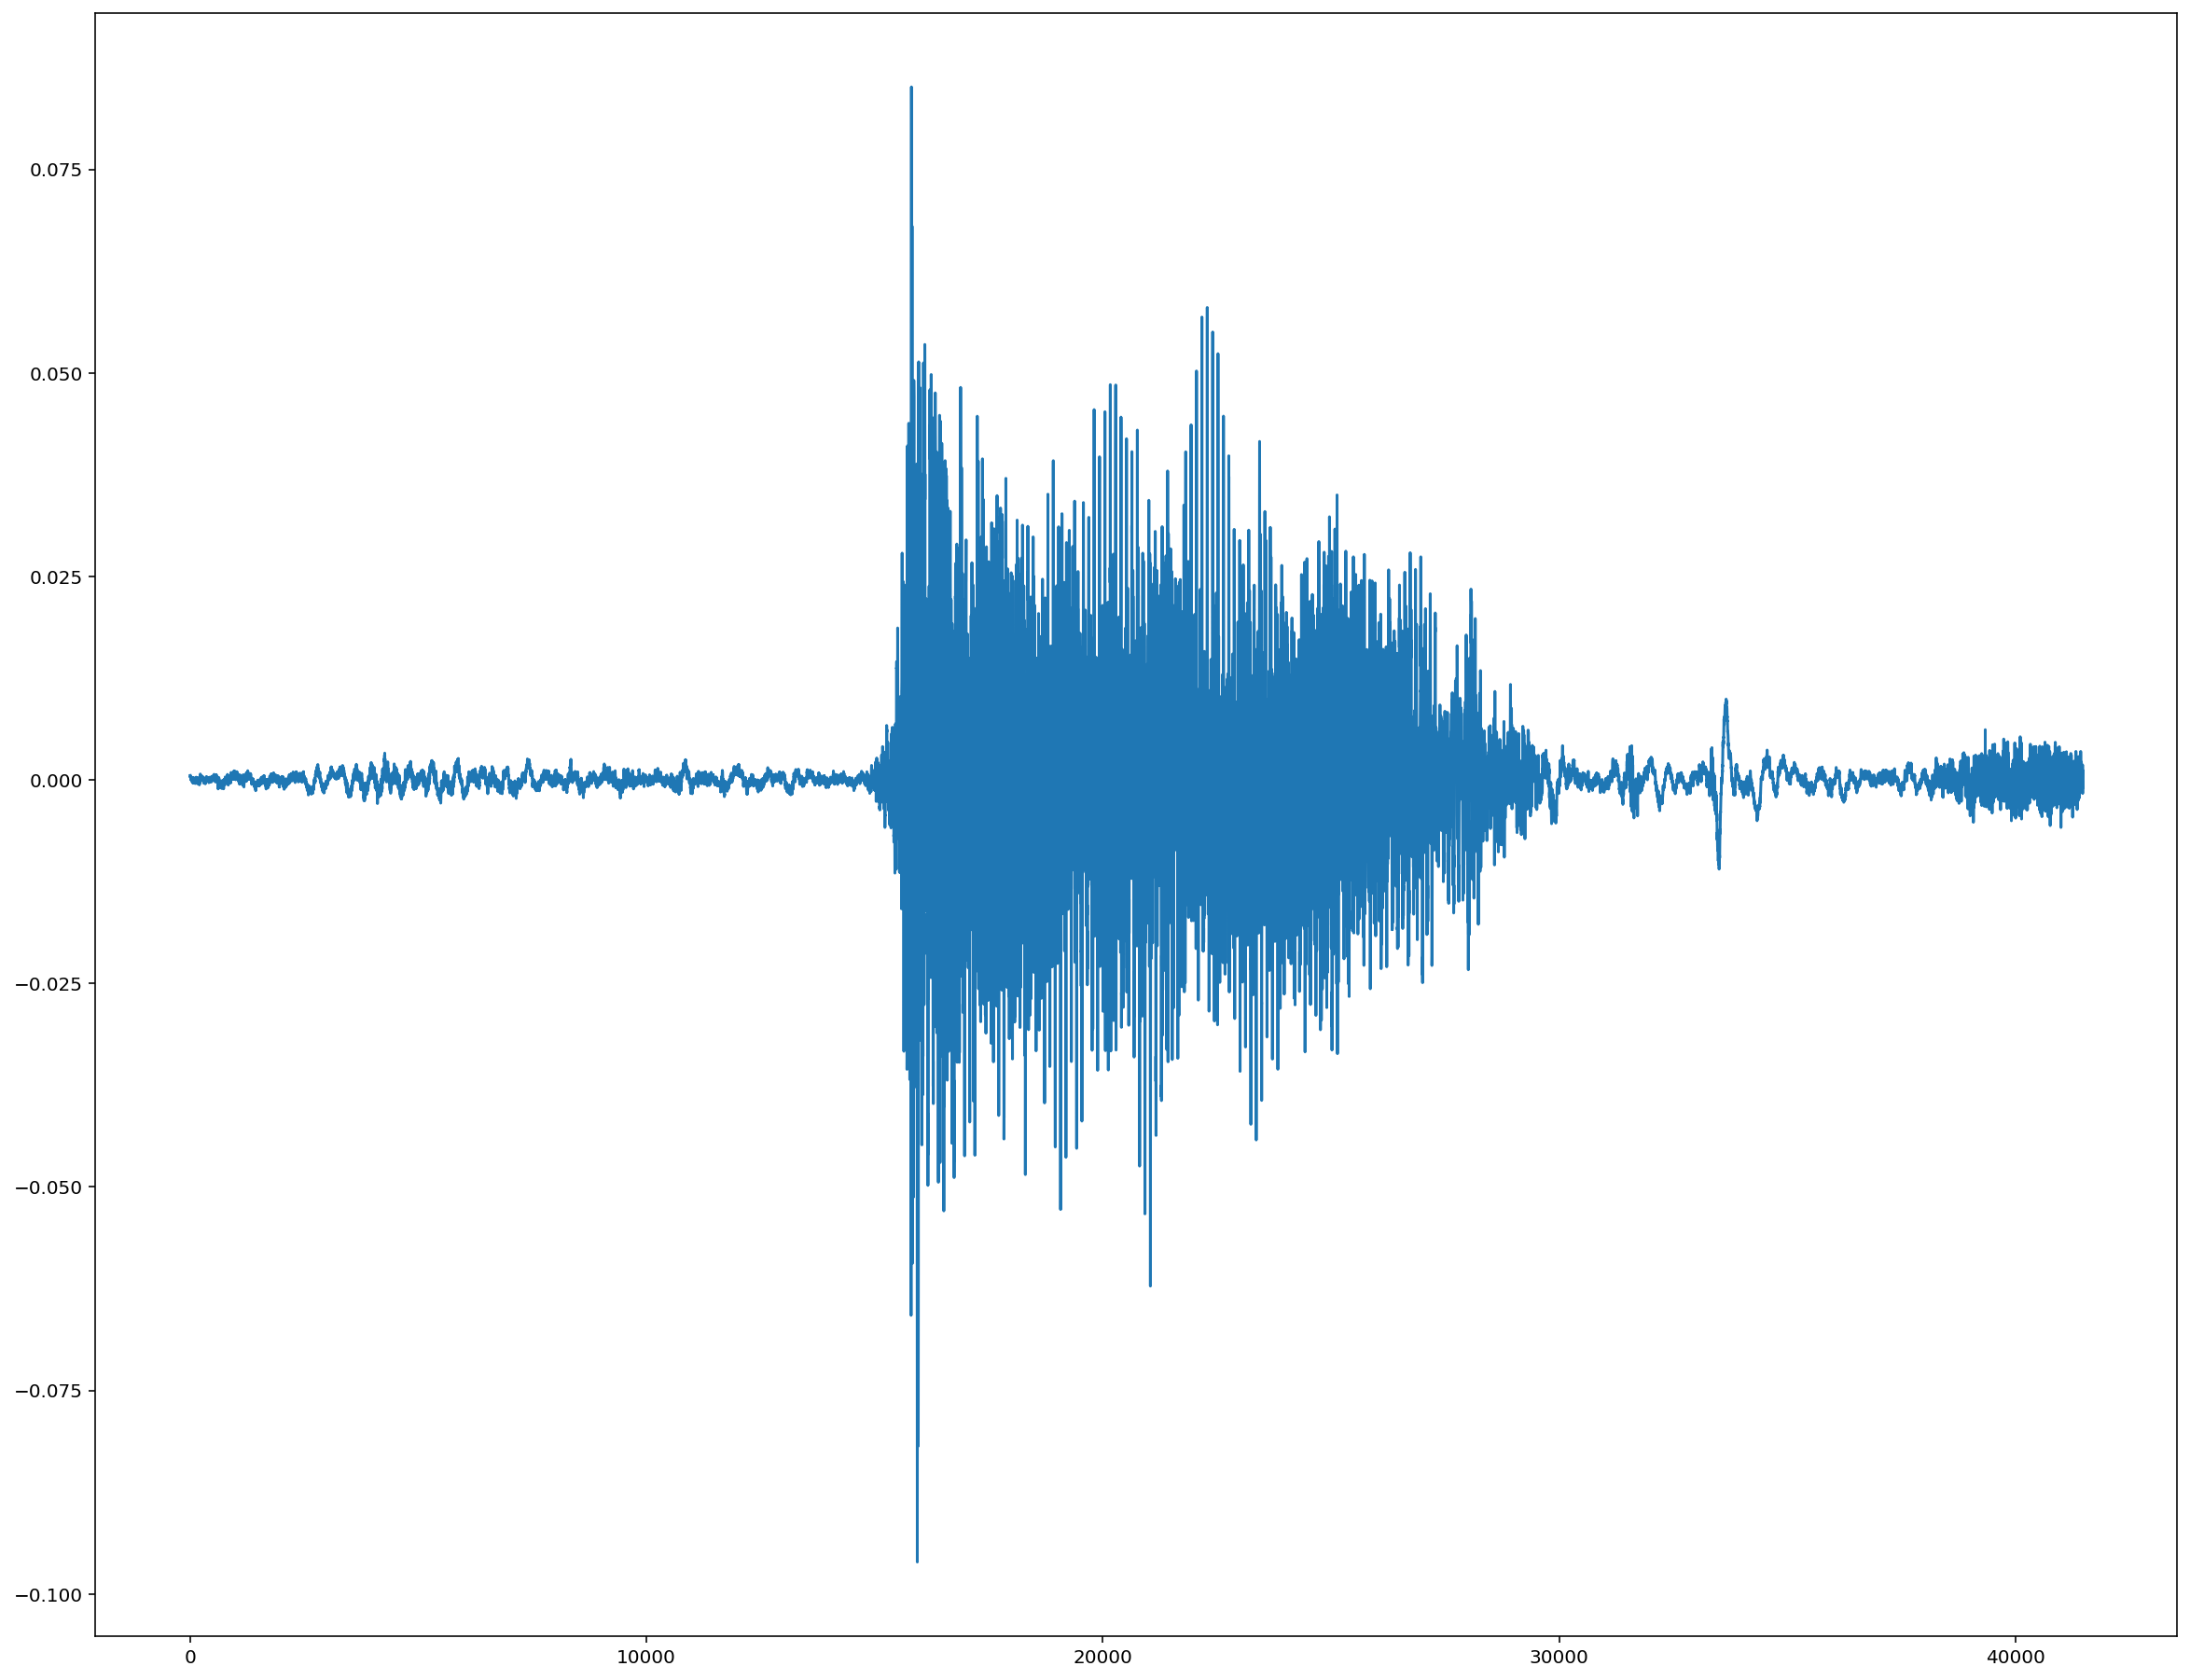

In [99]:
plt.plot(x_out)

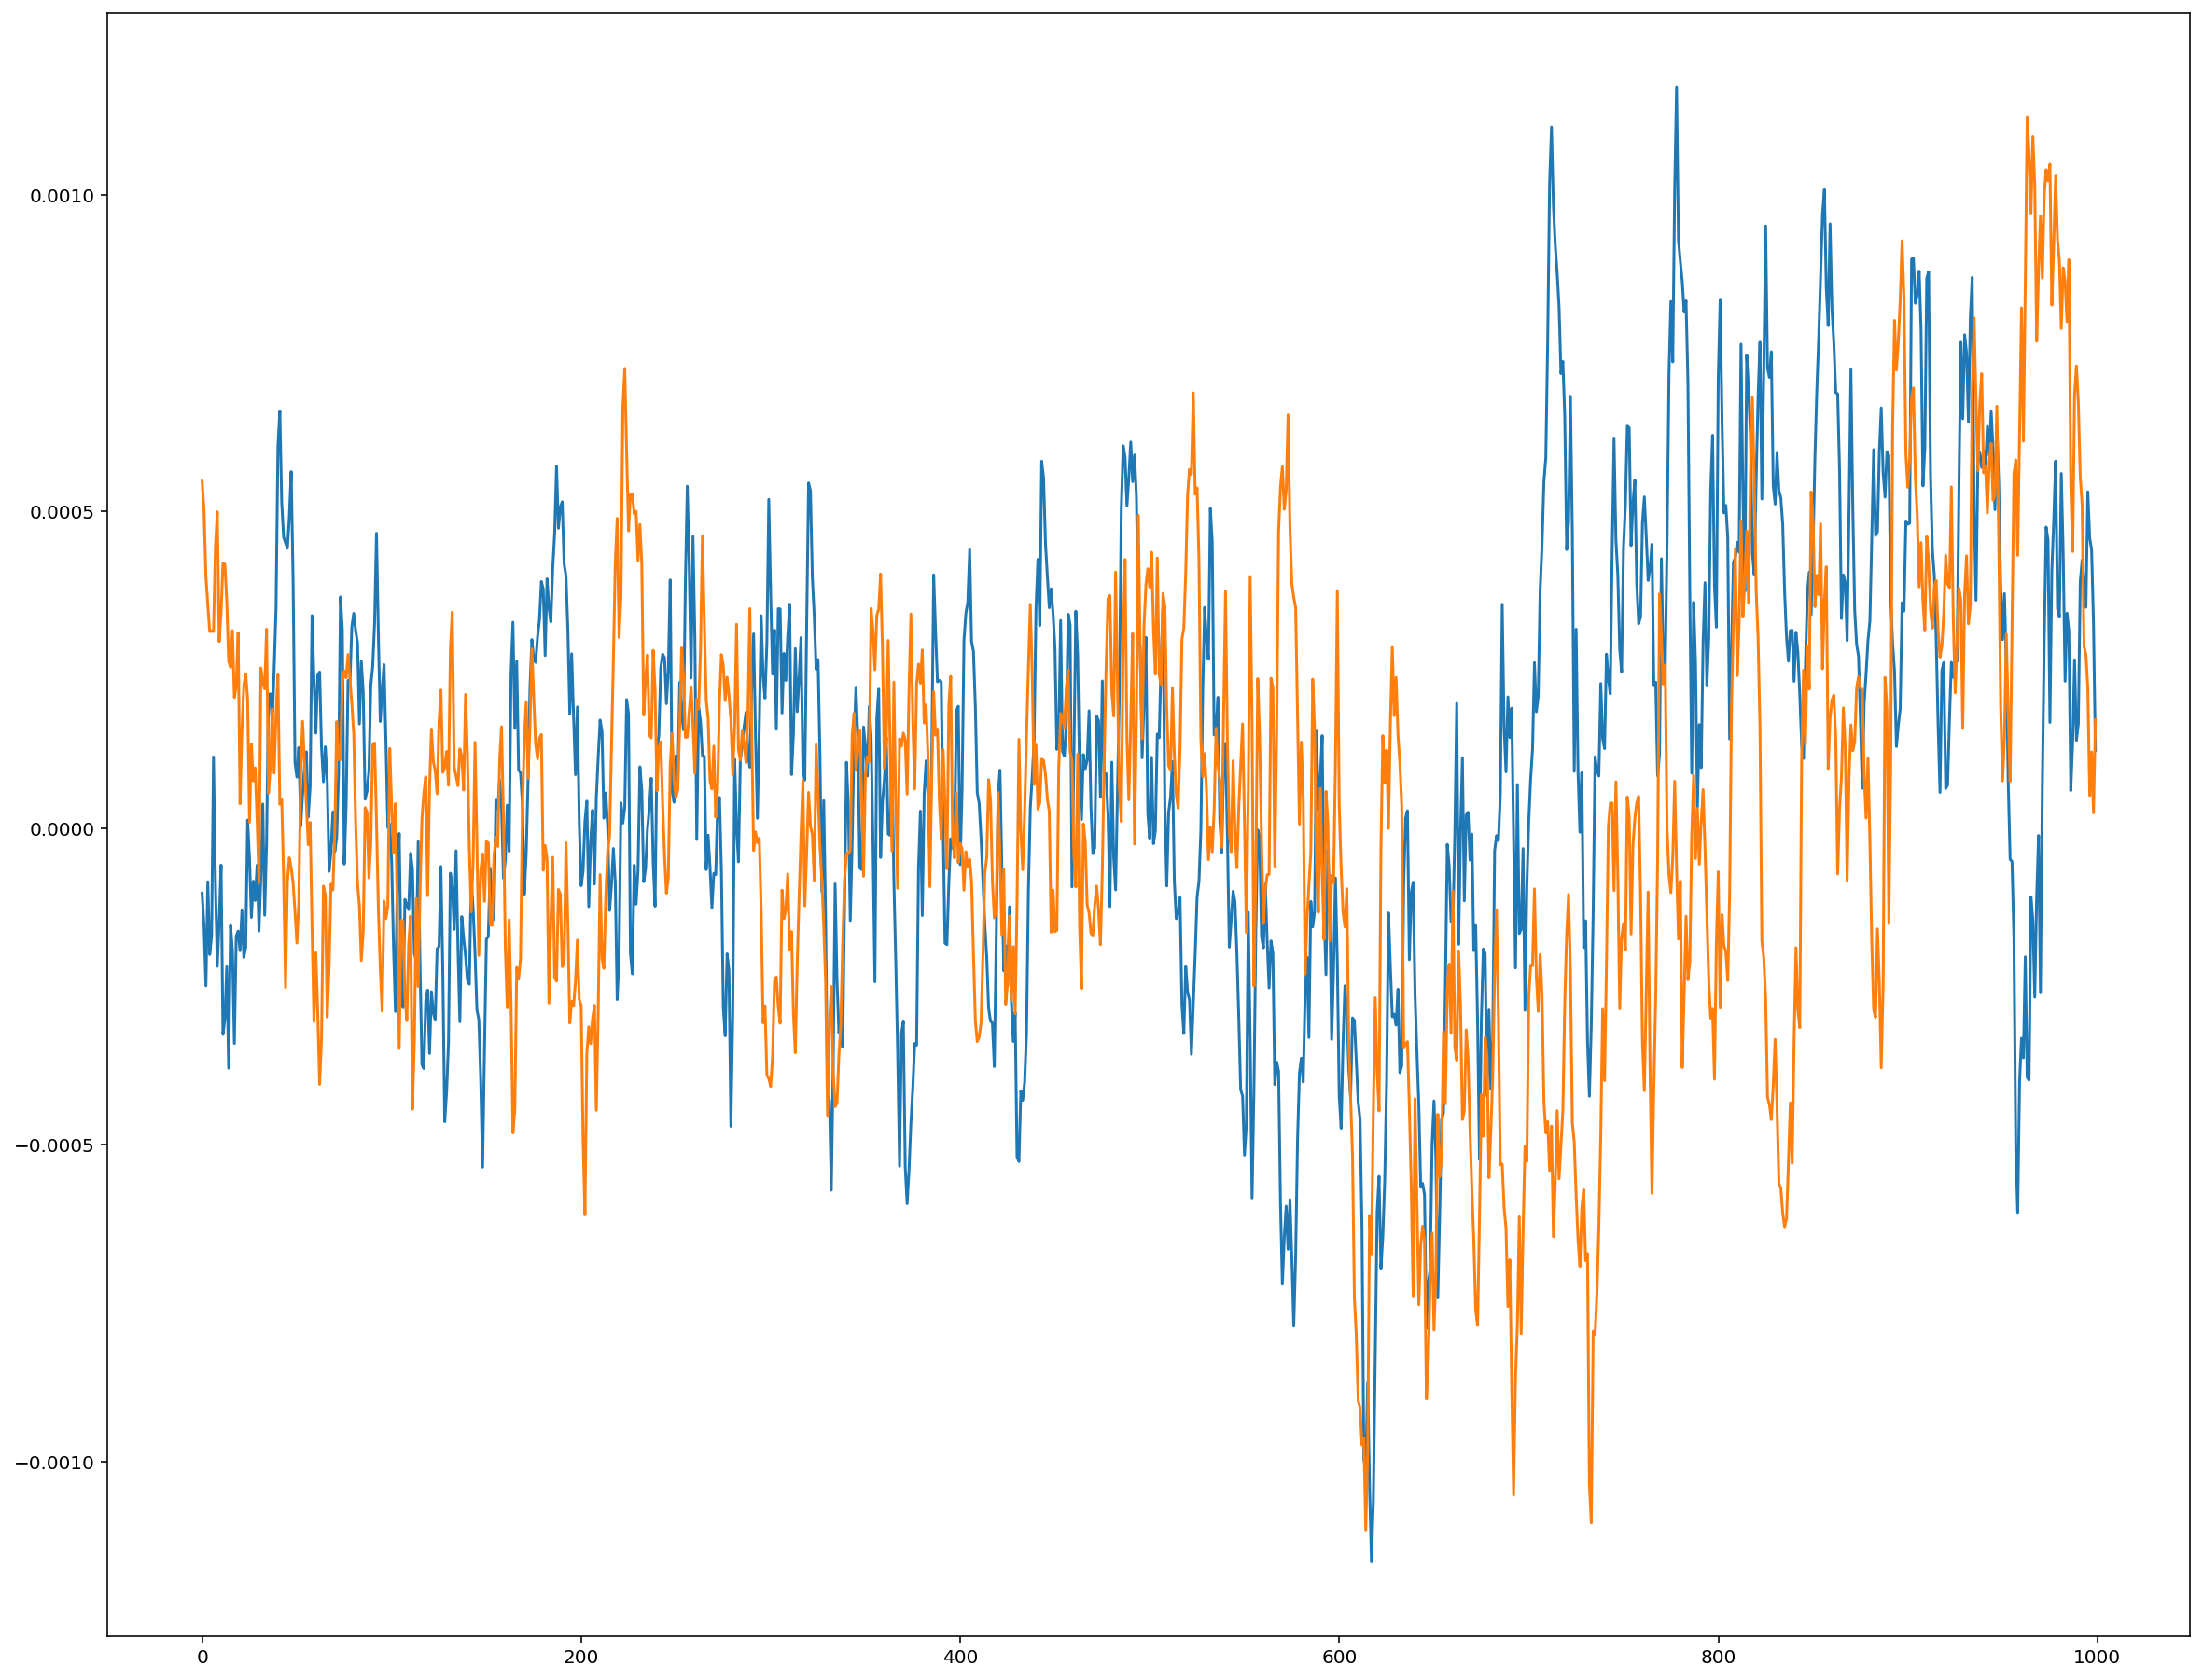

In [100]:
plt.plot(x[:1000])
plt.plot(x_out[:1000])

The Griffin and Lim method is not a perfect reconstruction.
Let's compare this to directly inverting the complex specta from STFT:

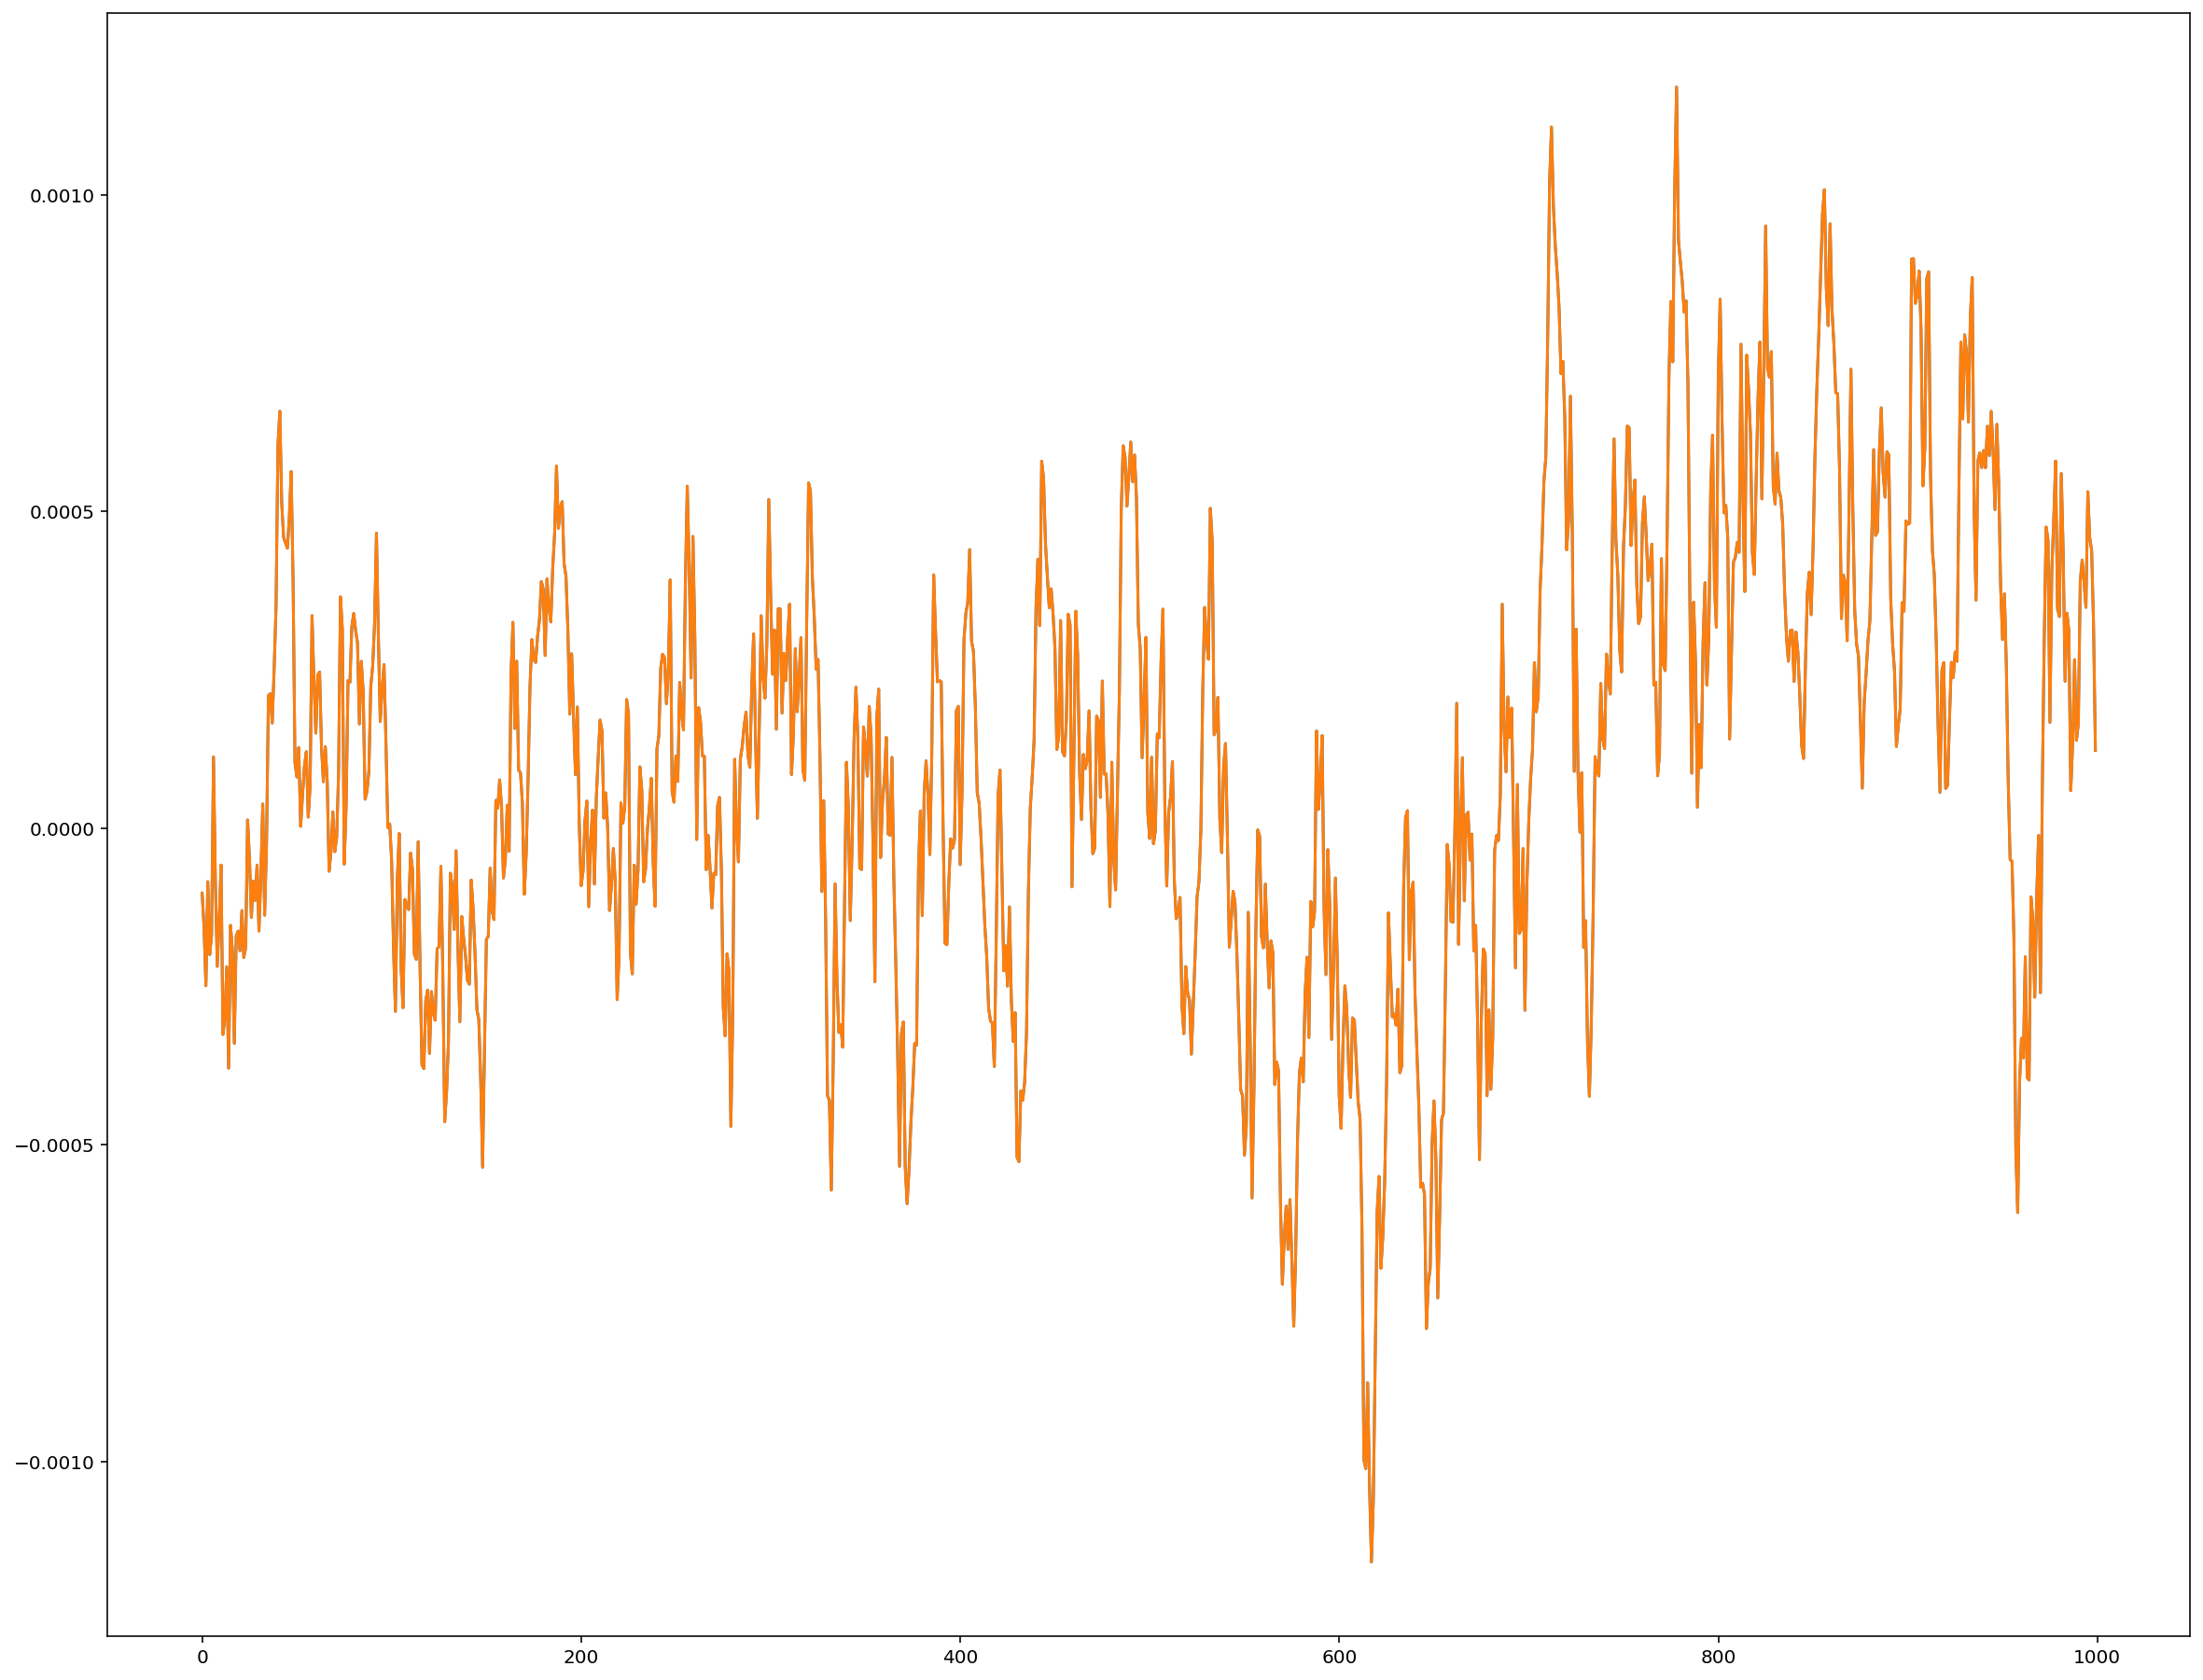

In [101]:
S = librosa.stft(x, n_fft)
x_inv = librosa.istft(S, win_length=n_fft)
plt.plot(x[:1000])
plt.plot(x_inv[:1000])